In [1]:
import torch
from torchvision.datasets import ImageFolder
from torch.utils.data import Subset
import time
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import random
from transforms import TransformLoader

In [2]:
import logging

In [3]:
import sys
logger = logging.getLogger()
# logger.setLevel(logging.DEBUG)

In [4]:
fhandler = logging.FileHandler(filename='mylog.log', mode='a')
formatter = logging.Formatter('%(message)s')
fhandler.setFormatter(formatter)
logger.addHandler(fhandler)
logger.setLevel(logging.DEBUG)

In [5]:
logger.handlers[0].stream = sys.stdout

In [6]:
logging.info('a')

a


In [7]:
mini_all_base_classes_dataset = ImageFolder(
    root='/home/oscarli/projects/meta-analysis-classification/data/miniImagenet-base/train/',
    transform=TransformLoader(image_size=84).get_composed_transform(dataset_name='mini', aug=False),
    target_transform=None,)
mini_all_novel_classes_dataset = ImageFolder(
    root='/home/oscarli/projects/meta-analysis-classification/data/miniImagenet-base/test/',
    transform=TransformLoader(image_size=84).get_composed_transform(dataset_name='mini', aug=False),
    target_transform=None,)

In [8]:
start = time.time()
base_example_class_label = [
    mini_all_base_classes_dataset[i][1] for i in range(len(mini_all_base_classes_dataset))
]
end = time.time()

In [9]:
start = time.time()
novel_example_class_label = [
    mini_all_novel_classes_dataset[i][1] for i in range(len(mini_all_novel_classes_dataset))
]
end = time.time()

In [10]:
novel_example_class_label

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [11]:
Counter(novel_example_class_label)

Counter({0: 600,
         1: 600,
         2: 600,
         3: 600,
         4: 600,
         5: 600,
         6: 600,
         7: 600,
         8: 600,
         9: 600,
         10: 600,
         11: 600,
         12: 600,
         13: 600,
         14: 600,
         15: 600,
         16: 600,
         17: 600,
         18: 600,
         19: 600})

In [12]:
mini_all_base_classes_dataset.class_to_idx

{'n01532829': 0,
 'n01558993': 1,
 'n01704323': 2,
 'n01749939': 3,
 'n01770081': 4,
 'n01843383': 5,
 'n01910747': 6,
 'n02074367': 7,
 'n02089867': 8,
 'n02091831': 9,
 'n02101006': 10,
 'n02105505': 11,
 'n02108089': 12,
 'n02108551': 13,
 'n02108915': 14,
 'n02111277': 15,
 'n02113712': 16,
 'n02120079': 17,
 'n02165456': 18,
 'n02457408': 19,
 'n02606052': 20,
 'n02687172': 21,
 'n02747177': 22,
 'n02795169': 23,
 'n02823428': 24,
 'n02966193': 25,
 'n03017168': 26,
 'n03047690': 27,
 'n03062245': 28,
 'n03207743': 29,
 'n03220513': 30,
 'n03337140': 31,
 'n03347037': 32,
 'n03400231': 33,
 'n03476684': 34,
 'n03527444': 35,
 'n03676483': 36,
 'n03838899': 37,
 'n03854065': 38,
 'n03888605': 39,
 'n03908618': 40,
 'n03924679': 41,
 'n03998194': 42,
 'n04067472': 43,
 'n04243546': 44,
 'n04251144': 45,
 'n04258138': 46,
 'n04275548': 47,
 'n04296562': 48,
 'n04389033': 49,
 'n04435653': 50,
 'n04443257': 51,
 'n04509417': 52,
 'n04515003': 53,
 'n04596742': 54,
 'n04604644': 55,
 '

In [13]:
mini_all_novel_classes_dataset.class_to_idx

{'n01930112': 0,
 'n01981276': 1,
 'n02099601': 2,
 'n02110063': 3,
 'n02110341': 4,
 'n02116738': 5,
 'n02129165': 6,
 'n02219486': 7,
 'n02443484': 8,
 'n02871525': 9,
 'n03127925': 10,
 'n03146219': 11,
 'n03272010': 12,
 'n03544143': 13,
 'n03775546': 14,
 'n04146614': 15,
 'n04149813': 16,
 'n04418357': 17,
 'n04522168': 18,
 'n07613480': 19}

In [14]:
idx_to_base_class = {a[1]: a[0] for a in mini_all_base_classes_dataset.class_to_idx.items()}
idx_to_novel_class = {a[1]: a[0] for a in mini_all_novel_classes_dataset.class_to_idx.items()}

In [15]:
idx_to_novel_class

{0: 'n01930112',
 1: 'n01981276',
 2: 'n02099601',
 3: 'n02110063',
 4: 'n02110341',
 5: 'n02116738',
 6: 'n02129165',
 7: 'n02219486',
 8: 'n02443484',
 9: 'n02871525',
 10: 'n03127925',
 11: 'n03146219',
 12: 'n03272010',
 13: 'n03544143',
 14: 'n03775546',
 15: 'n04146614',
 16: 'n04149813',
 17: 'n04418357',
 18: 'n04522168',
 19: 'n07613480'}

In [16]:
class Subset_with_label_remap(torch.utils.data.Subset):
    def __init__(self, dataset, indices, label_remap_dictionary):
        super().__init__(dataset=dataset, indices=indices)
        self.label_remap_dictionary = label_remap_dictionary
    def __getitem__(self, i):
        x, y = super().__getitem__(i)
        return x, self.label_remap_dictionary[y]

In [17]:
def n_way_dataset(all_classes_dataset, example_class_label, n_class_list):
    chosen_indices = [i for i in range(len(example_class_label)) if example_class_label[i] in set(n_class_list)]
    return Subset_with_label_remap(
        dataset=all_classes_dataset,
        indices=chosen_indices,
        label_remap_dictionary={x[1]: x[0] for x in enumerate(random.sample(n_class_list, len(n_class_list)))} # shuffle the labels
    )

In [18]:
# classes_chosen = [7,10,29,35,59]
classes_chosen = [0, 4, 6, 13, 19]

In [19]:
d1 = n_way_dataset(
    all_classes_dataset=mini_all_novel_classes_dataset,
    example_class_label=novel_example_class_label,
    n_class_list=classes_chosen)

In [20]:
[idx_to_novel_class[cl] for cl in classes_chosen]

['n01930112', 'n02110341', 'n02129165', 'n03544143', 'n07613480']

In [21]:
len(d1)

3000

In [22]:
def chw2hwc(img):
    return np.transpose(a=img, axes=(1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal bold normal>) = 10.335
findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal bold normal>) = 10.335
findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.ttf) normal normal bold normal>) = 10.335
findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal bold normal>) = 11.335
findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font '

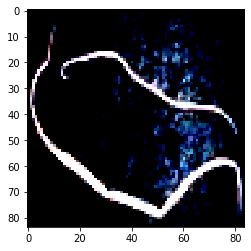

2




Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


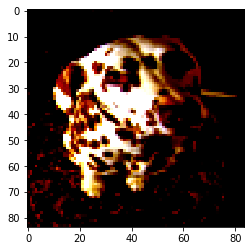

0




Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


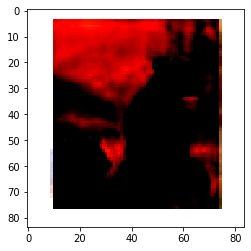

4




Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


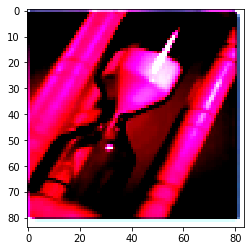

1




Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


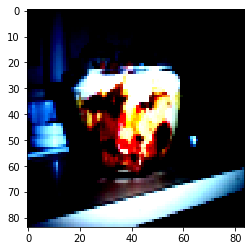

3






In [23]:
example_idx = [300, 900, 1500, 2100, 2700]
for idx in example_idx:
    plt.imshow(chw2hwc(np.asarray(d1[idx][0])))
    plt.show()
    print(d1[idx][1])
    print('\n'*3)

In [24]:
n_way = 5

from models import get_model
from task2vec import Task2Vec
probe_network = get_model(
                    model_name='resnet34',
                    pretrained=True,
                    num_classes=n_way)
probe_network = probe_network.to('cuda:0')
t2v = Task2Vec(
    model=probe_network,
    skip_layers=0, # starting from which layer is gradient computed for 
    max_samples=None, # number of samples to fit the last layer
    classifier_opts={
        'optimizer': 'adam',
        'epochs': 10,
        'learning_rate': 0.0004,
        'weight_decay': 0.0001
        },
    method='montecarlo',
    method_opts=None,
    loader_opts=None,
    bernoulli=False)

base_task_class_tuples = [
    tuple(sorted(np.random.choice(np.unique(base_example_class_label), size=n_way, replace=False, p=None)))
        for _ in range(1)
]
base_embedding_dict = {}
for cl_tuple in base_task_class_tuples:
    dataset = n_way_dataset(
        all_classes_dataset=mini_all_base_classes_dataset,
        example_class_label=base_example_class_label,
        n_class_list=list(cl_tuple)
    )
    base_embedding_dict[cl_tuple] = t2v.embed(dataset=dataset)

Caching features...


Fitting final classifier...


[epoch 0]: loss: 3.153703263920286	error: 82.91440217391305
[epoch 1]: loss: 2.424323128617328	error: 95.1086956521739
[epoch 2]: loss: 2.5710912528245347	error: 97.31657608695652
[epoch 3]: loss: 2.536303735297659	error: 97.24864130434783
[epoch 4]: loss: 2.5368128859478496	error: 97.5883152173913
[epoch 5]: loss: 2.5305515942366226	error: 97.69021739130434
[epoch 6]: loss: 2.5249543371407883	error: 97.89402173913044
[epoch 7]: loss: 2.519371885320415	error: 98.06385869565217
[epoch 8]: loss: 2.513961934525034	error: 98.09782608695652
[epoch 9]: loss: 2.508794789728911	error: 98.16576086956522
Using montecarlo Fisher
Computing Fisher...
	epoch 1/1


done


# Has modified the function __get_loader() to remove the weighted sampler on the example level

In [16]:
probe_network.layers

[Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False),
 BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 ReLU(inplace=True),
 MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False),
 Sequential(
   (0): BasicBlock(
     (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (relu): ReLU(inplace=True)
     (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   )
   (1): BasicBlock(
     (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (relu): ReLU(inplace=True)
     (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), pad